# Bài tập 7 - Phát hiện biên cạnh với Hough Transform

Bước 1: Tính ảnh biên cạnh: Edge (dùng ảnh năng lượng)

Bước 2: Khởi tạo H là ma trận 0

Bước 3:

Với mỗi điểm (x, y) thuộc Edge

    với mỗi điểm theta thuộc 0->360

    tính pro = xcos(theta) + y sin(theta)

    Cộng tích lũy H[pro, theta]++1

Bước 4: Chọn ra những điểm pro và theta "đủ lớn":

    H[pro0, theta0] > threshold (threshold có thể chọn 50-100)

    Trực quan hóa phương trình: pro0 = xcos(theta0) + y sin(theta0)



**Ví Dụ:**

Input:

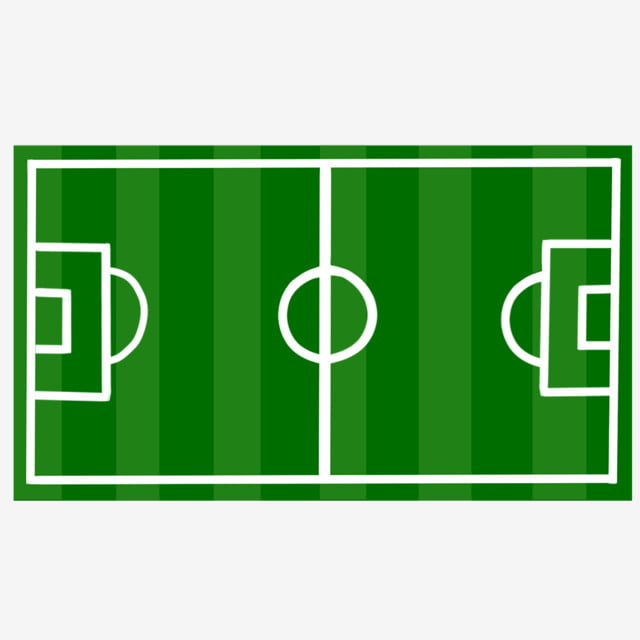

Output:

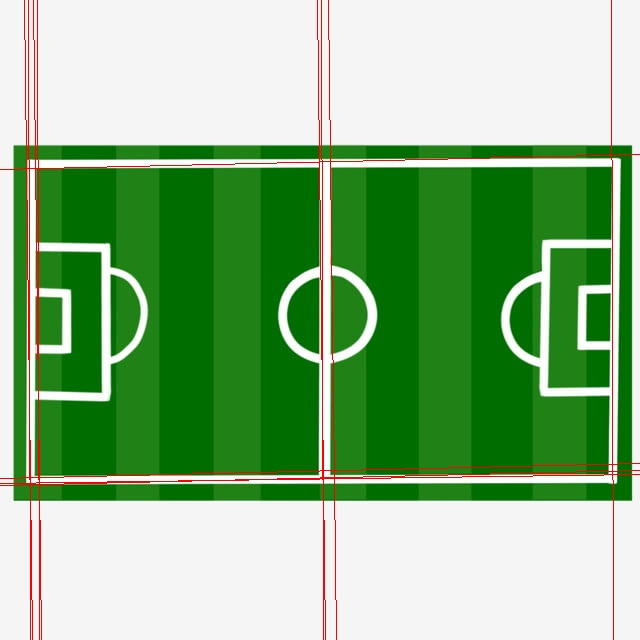

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def deg2grad(deg):
    return deg*3.141592654/180

In [ ]:
def get_edge(img):
  #Hoàn thành hàm tính các điểm biên cạnh
  ### BEGIN SOLUTION
    # convert anh BGR sang GRAY
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Su dung ham Canny de xac dinh bien canh
    edges = cv2.Canny(gray, 50, 255, None, 3)

    # tra ve idx : toa do cac diem bien canh
    idx = np.squeeze(cv2.findNonZero(edges))
  ### END SOLUTION

    return idx

In [ ]:
# Step 1: accumulate hough space
def accumulate(point, theta_range, H, dig ):
    #for theta in range(360):
    for theta in theta_range:
        pro = point[0]*np.cos(theta) + point[1]*np.sin(theta)
        # If pro in range of Hough space
        
        if pro >= 0 and pro < dig:
            # map theta to Hough space
            # (theta - (-3.14))/0.01
            H[int(pro), int((theta+3.14)/0.01)] += 1

    # line_idx = np.where(H )
    return H

In [ ]:
def sol(img_path):
  #Đọc ảnh đầu vào và lấy các giá trị chiều dài rộng
  img = cv2.imread(img_path)
  h, w, _ = img.shape
  ### BEGIN SOLUTION
  # lay cac diem bien canh
  idx_point = get_edge(img)

  dig = int(math.sqrt(h **2 + w **2))
  
  theta_range = np.arange(-3.14, 3.14, 0.01)

  H = np.zeros((dig, len(theta_range)), dtype=np.uint8)
    
  for idx, i in enumerate(idx_point):
      accumulate(i, theta_range, H, dig)
    

  lines = np.where(H > 150)
  
  # ve cac duong thang bien canh da xac dinh duoc
  if lines is not None:
      for i in zip(lines[0], lines[1]):
          pro = i[0]
          th = i[1] * 0.01 - np.pi
          a = math.cos(th)
          b = math.sin(th)
          x0 = a * pro
          y0 = b * pro
          pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
          pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
          cv2.line(img, pt1, pt2, (0,0,255), 1)

  ###END SOLUTION

  return img

<function matplotlib.pyplot.show(*args, **kw)>

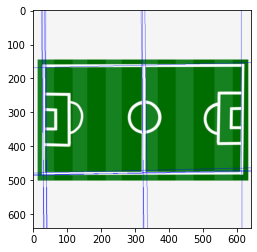

In [ ]:
# Test thu ảnh

res = sol('sanbong2.jpg')
plt.imshow(res)
plt.show

In [ ]:
### BEGIN HIDDEN TESTS

def get_edge(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 255, None, 3)
    idx = np.squeeze(cv2.findNonZero(edges))
    return idx

def deg2grad(deg):
    return deg*3.141592654/180
# Step 0.5: initialize hough table

# Step 1: accumulate hough space
def accumulate(point, theta_range, H, dig ):
    #for theta in range(360):
    for theta in theta_range:
        pro = point[0]*np.cos(theta) + point[1]*np.sin(theta)
        # If pro in range of Hough space
        
        if pro >= 0 and pro < dig:
            # map theta to Hough space
            # (theta - (-3.14))/0.01
            H[int(pro), int((theta+3.14)/0.01)] += 1

    # line_idx = np.where(H )
    return H


def sol_for_test(img):

    img = cv2.imread('sanbong2.jpg')
    h, w, _ = img.shape
    
    idx_point = get_edge(img)
    dig = int(math.sqrt(h ** 2 + w ** 2))
   
    theta_range = np.arange(-3.14, 3.14, 0.01)
    H = np.zeros((dig, len(theta_range)), dtype=np.uint8)
    
    for idx, i in enumerate(idx_point):
        accumulate(i, theta_range, H, dig)
 
    lines = np.where(H > 150)
    if lines is not None:
        for i in zip(lines[0], lines[1]):
            pro = i[0]
            th = i[1] * 0.01 - np.pi
            a = math.cos(th)
            b = math.sin(th)
            x0 = a * pro
            y0 = b * pro
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(img, pt1, pt2, (0,0,255), 1)
    return img

img_path = ''
assert np.all(sol(img_path) == sol_for_test(img_path))
### END HIDDEN TESTS